In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from sympy import symbols, Eq, solve
%matplotlib inline

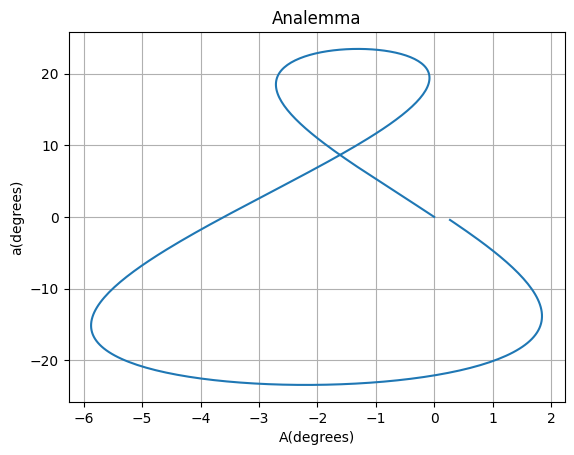

In [137]:
def equation_to_solve(theta,t,theta_0,c,e):
    return c*(theta-theta_0 -2*e*(np.sin(theta)-np.sin(theta_0))) - t

global theta_0,c,e,epsilon,w,T
theta_0 = 75*math.pi/180
c=58.1
e=0.0167
T=365.25
w=2*math.pi/T
epsilon = 23.44*math.pi/180
sol=np.array([])
t_vals=np.arange(0,365,1)

for t in t_vals:
    initial_guess=theta_0
    solution=fsolve(equation_to_solve,initial_guess,args=(t, theta_0, c, e))
    sol=np.append(sol,solution)
    

lambda_1 =np.empty(len(sol))
delta=np.empty(len(sol))
alpha=np.empty(len(sol))
a=np.empty(len(sol))
A=np.empty(len(sol))
l=np.empty(len(sol))
for i in range(len(sol)):
    l[i]=w*t_vals[i]
    lambda_1[i] = sol[i] - theta_0
    delta[i] = np.arcsin(np.sin(lambda_1[i])*np.sin(epsilon))
    if lambda_1[i]>3*math.pi/2:
        alpha[i] = np.arctan(np.tan(lambda_1[i])*np.cos(epsilon)) + 2*math.pi
    elif lambda_1[i]>math.pi/2:
        alpha[i] = np.arctan(np.tan(lambda_1[i])*np.cos(epsilon)) + math.pi
    elif lambda_1[i]>math.pi:
        alpha[i] = np.arctan(np.tan(lambda_1[i])*np.cos(epsilon)) + 3*math.pi/2
    elif lambda_1[i]<math.pi/2:
        alpha[i] = np.arctan(np.tan(lambda_1[i])*np.cos(epsilon)) 
  

# print(lambda_1)
# print(l)
for j in range(len(sol)):    
    A[j]=alpha[j]-l[j]
    a[j]=delta[j]

plt.plot(np.rad2deg(A),np.rad2deg(a))
plt.grid(True)
plt.xlabel("A(degrees)")
plt.ylabel("a(degrees)")
plt.title("Analemma")
plt.show()


